In [3]:
import numpy as np
import sympy as sp
from PIL import Image
from scipy import interpolate
import matplotlib.pyplot as plt
from sympy.abc import x,y

# Tarea 3:Interpolación Bicúbica

## Instrucciones

* La tarea es individual.
* Las consultas sobre las tareas se deben realizar por medio de la plataforma Aula.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, entre otras, así como la correcta implementación de algoritmos de forma vectorizada.
*  **El archivo de entrega debe denominarse ROL-tarea-numero.ipynb**. _De no respetarse este formato existirá un descuento de **50 puntos**_
* La fecha de entrega es el viernes 24 de Julio a las **18:00 hrs**.  Se aceptarán entregas hasta las 19:00 hrs sin descuento en caso de existir algun problema, posteriormente existirá un descuento lineal hasta las 20:00 hrs del mismo día.
* Las tareas que sean entregadas antes del jueves a mediodía recibirán una bonificación de 10 puntos
* Debe citar cualquier código ajeno utilizado (incluso si proviene de los Jupyter Notebooks del curso).


## Introducción

En la siguiente tarea estudiaremos un método de interpolación denominado **Interpolación Bicúbica**, utilizada frecuentemente sobre imágenes. Aplicaremos el método para aumentar la resolución de una imagen intentando preservar las propiedades de la versión original.

## Contexto

Supongamos que usted conoce $f$ y las derivadas $f_x$, $f_y$ y $f_{xy}$ dentro de las coordenadas $(0,0),(0,1),(1,0)$ y $(1,1)$ de un cuadrado unitario. La superficie que interpola estos 4 puntos es:

$$
p(x,y) = \sum\limits_{i=0}^3 \sum_{j=0}^3 a_{ij} x^i y^j.
$$

Como se puede observar el problema de interpolación se resume en determinar los 16 coeficientes $a_{ij}$ y para esto se genera un total de $16$ ecuaciones utilizando los valores conocidos de $f$,$f_x$,$f_y$ y $f_{xy}$. Por ejemplo, las primeras $4$ ecuaciones son:

$$
\begin{aligned}
f(0,0)&=p(0,0)=a_{00},\\
f(1,0)&=p(1,0)=a_{00}+a_{10}+a_{20}+a_{30},\\
f(0,1)&=p(0,1)=a_{00}+a_{01}+a_{02}+a_{03},\\
f(1,1)&=p(1,1)=\textstyle \sum \limits _{i=0}^{3}\sum \limits _{j=0}^{3}a_{ij}.
\end{aligned}
$$

Para las $12$ ecuaciones restantes se debe utilizar:

$$
\begin{aligned}
f_{x}(x,y)&=p_{x}(x,y)=\textstyle \sum \limits _{i=1}^{3}\sum \limits _{j=0}^{3}a_{ij}ix^{i-1}y^{j},\\
f_{y}(x,y)&=p_{y}(x,y)=\textstyle \sum \limits _{i=0}^{3}\sum \limits _{j=1}^{3}a_{ij}x^{i}jy^{j-1},\\
f_{xy}(x,y)&=p_{xy}(x,y)=\textstyle \sum \limits _{i=1}^{3}\sum \limits _{j=1}^{3}a_{ij}ix^{i-1}jy^{j-1}.
\end{aligned}
$$


Una vez planteadas las ecuaciones, los coeficientes se pueden obtener al resolver el problema $A\alpha=x$, donde $\alpha=\left[\begin{smallmatrix}a_{00}&a_{10}&a_{20}&a_{30}&a_{01}&a_{11}&a_{21}&a_{31}&a_{02}&a_{12}&a_{22}&a_{32}&a_{03}&a_{13}&a_{23}&a_{33}\end{smallmatrix}\right]^T$ y ${\displaystyle x=\left[{\begin{smallmatrix}f(0,0)&f(1,0)&f(0,1)&f(1,1)&f_{x}(0,0)&f_{x}(1,0)&f_{x}(0,1)&f_{x}(1,1)&f_{y}(0,0)&f_{y}(1,0)&f_{y}(0,1)&f_{y}(1,1)&f_{xy}(0,0)&f_{xy}(1,0)&f_{xy}(0,1)&f_{xy}(1,1)\end{smallmatrix}}\right]^{T}}$.


En un contexto más aplicado, podemos hacer uso de la interpolación bicúbica para aumentar la resolución de una imagen. Supongamos que tenemos la siguiente imagen de tamaño $5 \times 5$:

<img src="img1.png" width="20%"/>

Podemos ir tomando segmentos de la imagen de tamaño $2 \times 2$ de la siguiente forma:

<img src="img2.png" width="50%"/>

Por cada segmento podemos generar una superficie interpoladora mediante el algoritmo de interpolación cubica. Para el ejemplo anterior estariamos generando $16$ superficies interpoladoras distintas. La idea es hacer uso de estas superficies para estimar los valores de los pixeles correspondienets a una imagen más grande. Por ejemplo, la imagen $5 \times 5$ la podemos convertir a una imagen de $9 \times 9$ agregando un pixel entre cada par de pixeles originales además de uno en el centro para que no quede un hueco.

<img src="img3.png" width="50%"/>

Aca los pixeles verdes son los mismos que la imagen original y los azules son obtenidos de evaluar cada superficie interpoladora. Notar que existen pixeles azules que se pueden obtener a partir de dos superficies interpoladoras distintas, en esos casos se puede promediar el valor de los pixeles o simplemente dejar uno de los dos. 

Para trabajar con la interpolación bicubica necesitamos conocer los valores de $f_x$, $f_y$ y $f_{xy}$. En el caso de las imagenes solo tenemos acceso al valor de cada pixel por lo que deberemos estimar cual es el valor de estos. Para estimar $f_x$ haremos lo siguiente:

Para estimar el valor de $f_x$ en cada pixel haremos una interpolación con los algoritmos conocidos, usando tres pixels en dirección de las filas, luego derivaremos el polinomio obtenido y finalmente evaluaremos en la posición de interes. La misma idea aplica para $f_y$ solo que ahora interpolaremos en dirección de las columnas.

<img src="img5.png" width="60%"/>

Por ejemplo si queremos obtener el valor de $f_x$ en la posición $(0,0)$ (imagen de la izquierda) entonces haremos una interpolación de Lagrange utilizando los pixeles $(0,0),(0,1)$ y $(0,2)$. Derivaremos el polinomio interpolador y evaluaremos en $(0,0)$. Por otro lado si queremos obtener el valor de $f_y$ en la posición $(0,0)$ (imagen de la derecha) entonces interpolaremos los pixeles $(0,0),(1,0)$ y $(2,0)$. Luego derivaremos el polinomio interpolador y evaluaremos en $(0,0)$.

Para obtener $f_{xy}$ seguiremos la idea anterior. Solo que esta vez se utilizaran los valores de $f_y$ y se interpolaran estos en dirección de las filas.

# Preguntas

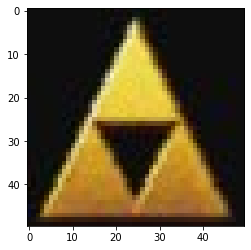

In [670]:
#Codigo para abrir y visualizar imágenes
img = Image.open('trifue.jpg')
array=np.array(img)
imgplot = plt.imshow(array)
plt.show()

## 1. Interpolación bicubica

### 1.1  Obtener derivadas (30 puntos)

Implemente la función `derivativeValues` que reciba como input un arreglo con valores, el método de interpolación y si es que se considera el uso de  los puntos de chebyshev . La función debe retornar un arreglo de igual dimensión con los valores de las derivadas de los puntos obtenidas

Los métodos de interpolación serán representados por los siguientes valores

* Interpolación de lagrange: `'lagrange'`
* Diferencias divididas de Newton: `'newton'`
* Spline cubica: `'spline3'`


In [694]:
'''Función que separa una imagen en matrices con sus respectivos canales'''
def separar_por_canal(img_array):
    n = img_array.shape[0]
    R = np.zeros((n,n))
    G = np.zeros((n,n))
    B = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            R[i,j] = img_array[i][j][0]
            G[i,j] = img_array[i][j][1]
            B[i,j] = img_array[i][j][2]
    return R,G,B

In [695]:
'''Funcion que entrega puntos de chebyshev según rango'''
def chebyshevNodes(n,a,b):
    i = np.arange(1, n+1)
    t = (2*i - 1) * np.pi / (2 * n)
    return ((b+a)/2 + (b - a)/2 * np.cos(t))

In [567]:
def derivativeValues(values, method, cheb):
    """
    Parameters
    ----------
    values:	(int array) points values
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used

    Returns
    -------
    d:	(float array) derivative value of interpolated points

    """
    d = np.zeros(values.shape[-1])
    n = values.shape[-1]
    if method == 'lagrange':
        for indice in range(n):
            x_values = np.arange(3)
            if indice == n - 2:
                y_values = np.array([values[indice - 1], values[indice], values[indice + 1]])
            elif indice == n - 1:
                y_values = np.array([values[indice - 2], values[indice - 1], values[indice]])
            else:
                y_values = np.array([values[indice], values[indice + 1], values[indice + 2]])
            m = x_values.shape[-1]
            L = lambda x: np.dot(y_values, np.array([np.prod(x - np.delete(x_values, k)) 
                                    / np.prod(x_values[k] - np.delete(x_values, k)) for k in range(m)]))
            Pl = np.vectorize(L)
            dl = sp.Poly(L(x),x).diff()
            Pdl = np.vectorize(dl)
            x_e = np.linspace(np.amin(x_values),np.amax(x_values),100)
            if cheb:
                x_values = chebyshevNodes(3,-1,1)
                np.flip(x_values)
            if indice == n - 2:
                 d[indice] = Pdl(x_values[1])
            elif indice == n - 1:
                 d[indice] = Pdl(x_values[2])
            else:
                d[indice] = Pdl(x_values[0])
    if method == 'newton' :
        for indice in range(n):
            x_values = np.arange(3)
            m = x_values.shape[-1]
            if indice == n - 2:
                y_values = np.array([values[indice - 1], values[indice], values[indice + 1]])
            elif indice == n - 1:
                y_values = np.array([values[indice - 2], values[indice - 1], values[indice]])
            else:
                y_values = np.array([values[indice], values[indice + 1], values[indice + 2]])
            pyramid = np.zeros((m, m)) # Create a square matrix to hold pyramid
            pyramid[:,0] = y_values # first column is y
            for j in range(1,m):
                for i in range(m-j):
                    # create pyramid by updating other columns
                    pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x_values[i+j] - x_values[i])
            a = pyramid[0] # f[ ... ] coefficients
            N = lambda x: a[0] + np.dot(a[1:], np.array([np.prod(x - x_values[:i]) for i in range(1, m)]))
            Pn = np.vectorize(N)
            dn = sp.Poly(N(x),x).diff()
            Pdn = np.vectorize(dn)
            if cheb:
                x_values = chebyshevNodes(3,-1,1)
                np.flip(x_values)
            if indice == n - 2:
                 d[indice] = Pdn(x_values[1])
            elif indice == n - 1:
                 d[indice] = Pdn(x_values[2])
            else:
                d[indice] = Pdn(x_values[0])
    if method == 'spline3' :
        for indice in range(n):
            x_values = np.arange(3)
            m = x_values.shape[-1]
            if indice == n - 2:
                y_values = np.array([values[indice - 1], values[indice], values[indice + 1]])
            elif indice == n - 1:
                y_values = np.array([values[indice - 2], values[indice - 1], values[indice]])
            else:
                y_values = np.array([values[indice], values[indice + 1], values[indice + 2]])
            Pcs = interpolate.CubicSpline(x_values,y_values)
            Pdcs = interpolate.PPoly.derivative(Pcs)
            if cheb:
                x_values = chebyshevNodes(3,-1,1)
                np.flip(x_values)
            if indice == n - 2:
                 d[indice] = Pdcs(x_values[1])
            elif indice == n - 1:
                 d[indice] = Pdcs(x_values[2])
            else:
                d[indice] = Pdcs(x_values[0])
    return d


### 1.2 Interpolación de imagen (50 puntos)
Implemente la función `bicubicInterpolation` que reciba como input la matriz de la imagen y cuantos píxeles extra se quiere agregar entre los píxeles originales y el algoritmo de interpolación a utilizar. La función debe retornar la matriz con la imagen de dimensión nueva. Considere que se debe aplicar el método de interpolación en cada canal RGB por separado.

In [696]:
'''Funcion que crea la matriz A para resolver el sistema de ecuacion lineal'''
def crear_matriz_A():
    n = 16
    A = np.zeros((n,n))
    '''Llenar f '''
    A[0,0] = 1
    A[1,:4] = 1
    A[2,0] = A[2,4] = A[2,8] = A[2,12] = 1
    A[3,:] = 1
    '''Llenar fx '''
    A[4,1] = 1
    A[5,1] = 1
    A[5,2] = 2
    A[5,3] = 3
    A[6,1] = A[6,5] = A[6,9] = A[6,13] = 1
    A[7,1] = A[7,5] = A[7,9] = A[7,13] = 1
    A[7,2] = A[7,6] = A[7,10] = A[7,14] = 2
    A[7,3] = A[7,7] = A[7,11] = A[7,15] = 3
    '''Llenar fy '''
    A[8,4] = 1
    A[9,4:8] = 1
    A[10,4] = 1
    A[10,8] = 2
    A[10,12] = 3
    A[11,4:8] = 1
    A[11,8:12] = 2
    A[11,12:16] = 3
    '''Llenar fxy '''
    A[12,5] = 1
    A[13,5] = 1
    A[13,6] = 2
    A[13,7] = 3
    A[14,5] = 1
    A[14,9] = 2
    A[14,13] = 3
    A[15,5] = 1
    A[15,6] = A[15,9] = 2
    A[15,7] = A[15,13] = 3
    A[15,10] = 4
    A[15,11] = A[15,14] = 6
    A[15,15] = 9
    return A

In [654]:
def bicubicInterpolation(image, interiorPixels, method,cheb):
    """
    Parameters
    ----------
    image:	(nxnx3 array) image array in RGB format
    interiorPixels:	(int)	interpolation method
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used


    Returns
    -------
    newImage:	(nxnx3 array) image array in RGB format

    """
    A = crear_matriz_A()
    n = image.shape[0]
    R,G,B = separar_por_canal(image)
    n_nueva_imagen = (n - 1) * interiorPixels + n
    nuevo_R = np.zeros((n_nueva_imagen, n_nueva_imagen))
    nuevo_G = np.zeros((n_nueva_imagen, n_nueva_imagen))
    nuevo_B = np.zeros((n_nueva_imagen, n_nueva_imagen))
    Rx = np.zeros((n,n))
    Ry = np.zeros((n,n))
    Rxy = np.zeros((n,n))
    Gx = np.zeros((n,n))
    Gy = np.zeros((n,n))
    Gxy = np.zeros((n,n))
    Bx = np.zeros((n,n))
    By = np.zeros((n,n))
    Bxy = np.zeros((n,n))
    for i in range(n):
        R_aux_x = R[i,:]
        R_aux_y = R[:,i]
        G_aux_x = G[i,:]
        G_aux_y = G[:,i]
        B_aux_x = B[i,:]
        B_aux_y = B[:,i]
        Rdx = derivativeValues(R_aux_x,method,cheb)
        Rdy = derivativeValues(R_aux_y,method,cheb)
        Gdx = derivativeValues(G_aux_x,method,cheb)
        Gdy = derivativeValues(G_aux_y,method,cheb)
        Bdx = derivativeValues(B_aux_x,method,cheb)
        Bdy = derivativeValues(B_aux_y,method,cheb)
        Rx[i,:] = Rdx
        Ry[:,i] = Rdy
        Gx[i,:] = Gdx
        Gy[:,i] = Gdy
        Bx[i,:] = Bdx
        By[:,i] = Bdy
    for i in range(n):
        R_aux_x = Ry[i,:]
        G_aux_x = Gy[i,:]
        B_aux_x = By[i,:]
        Rdxy = derivativeValues(R_aux_x,method,cheb)
        Gdxy = derivativeValues(G_aux_x,method,cheb)
        Bdxy = derivativeValues(B_aux_x,method,cheb)
        Rxy[i,:] = Rdxy
        Gxy[i,:] = Gdxy
        Bxy[i,:] = Bdxy
    cont  = 0
    veces = 0
    q = 0
    w = 0
    r = 0
    e = 0
    flag = False
    for i in range(n - 1):
        for j in range(n - 1):
                '''CANAL R'''
                R_y_segmento = np.array([R[i,j],R[i,j + 1],R[i + 1,j],R[i + 1,j + 1]])
                R_y_segmento_dx = np.array([Rx[i,j],Rx[i,j + 1],Rx[i + 1,j],Rx[i + 1,j + 1]])
                R_y_segmento_dy = np.array([Ry[i,j],Ry[i,j + 1],Ry[i + 1,j],Ry[i + 1,j + 1]])
                R_y_segmento_dxy = np.array([Rxy[i,j],Rxy[i,j + 1],Rxy[i + 1,j],Rxy[i + 1,j + 1]])
                x_R = np.zeros(16)
                x_R[0] = R_y_segmento[0]
                x_R[1] = R_y_segmento[2]
                x_R[2] = R_y_segmento[1]
                x_R[3] = R_y_segmento[3]
                x_R[4] = R_y_segmento_dx[0]
                x_R[5] = R_y_segmento_dx[2]
                x_R[6] = R_y_segmento_dx[1]
                x_R[7] = R_y_segmento_dx[3]
                x_R[8] = R_y_segmento_dy[0]
                x_R[9] = R_y_segmento_dy[2]
                x_R[10] = R_y_segmento_dy[1]
                x_R[11] = R_y_segmento_dy[3]
                x_R[12] = R_y_segmento_dxy[0]
                x_R[13] = R_y_segmento_dxy[2]
                x_R[14] = R_y_segmento_dxy[1]
                x_R[15] = R_y_segmento_dxy[3]
                alfa_R = np.linalg.solve(A,x_R.T)
                f_R = lambda x,y: (alfa_R[0] + alfa_R[4] * y + alfa_R[8] * y**2 + alfa_R[12] * y**3
                    + alfa_R[1] * x + alfa_R[5] * x * y + alfa_R[9] * x * y**2 + alfa_R[13] * x * y**3
                    + alfa_R[2] * x**2 + alfa_R[6] * x**2 * y + alfa_R[10] * x**2 * y**2 + alfa_R[14] * x**2 * y**3
                    + alfa_R[3] * x**3 + alfa_R[7] * x**3 * y + alfa_R[11] * x**3 * y**2 + alfa_R[15] * x**3 * y**3)
                G_y_segmento = np.array([G[i,j],G[i,j + 1],G[i + 1,j],G[i + 1,j + 1]])
                G_y_segmento_dx = np.array([Gx[i,j],Gx[i,j + 1],Gx[i + 1,j],Gx[i + 1,j + 1]])
                G_y_segmento_dy = np.array([Gy[i,j],Gy[i,j + 1],Gy[i + 1,j],Gy[i + 1,j + 1]])
                G_y_segmento_dxy = np.array([Gxy[i,j],Gxy[i,j + 1],Gxy[i + 1,j],Gxy[i + 1,j + 1]])
                x_G = np.zeros(16)
                x_G[0] = G_y_segmento[0]
                x_G[1] = G_y_segmento[2]
                x_G[2] = G_y_segmento[1]
                x_G[3] = G_y_segmento[3]
                x_G[4] = G_y_segmento_dx[0]
                x_G[5] = G_y_segmento_dx[2]
                x_G[6] = G_y_segmento_dx[1]
                x_G[7] = G_y_segmento_dx[3]
                x_G[8] = G_y_segmento_dy[0]
                x_G[9] = G_y_segmento_dy[2]
                x_G[10] = G_y_segmento_dy[1]
                x_G[11] = G_y_segmento_dy[3]
                x_G[12] = G_y_segmento_dxy[0]
                x_G[13] = G_y_segmento_dxy[2]
                x_G[14] = G_y_segmento_dxy[1]
                x_G[15] = G_y_segmento_dxy[3]
                alfa_G = np.linalg.solve(A,x_G.T)
                f_G = lambda x,y: (alfa_G[0] + alfa_G[4] * y + alfa_G[8] * y**2 + alfa_G[12] * y**3
                + alfa_G[1] * x + alfa_G[5] * x * y + alfa_G[9] * x * y**2 + alfa_G[13] * x * y**3
                + alfa_G[2] * x**2 + alfa_G[6] * x**2 * y + alfa_G[10] * x**2 * y**2 + alfa_G[14] * x**2 * y**3
                + alfa_G[3] * x**3 + alfa_G[7] * x**3 * y + alfa_G[11] * x**3 * y**2 + alfa_G[15] * x**3 * y**3)
                ''''CANAL B'''
                B_y_segmento = np.array([B[i,j],B[i,j + 1],B[i + 1,j],B[i + 1,j + 1]])
                B_y_segmento_dx = np.array([Bx[i,j],Bx[i,j + 1],Bx[i + 1,j],Bx[i + 1,j + 1]])
                B_y_segmento_dy = np.array([By[i,j],By[i,j + 1],By[i + 1,j],By[i + 1,j + 1]])
                B_y_segmento_dxy = np.array([Bxy[i,j],Bxy[i,j + 1],Bxy[i + 1,j],Bxy[i + 1,j + 1]])
                x_B = np.zeros(16)
                x_B[0] = B_y_segmento[0]
                x_B[1] = B_y_segmento[2]
                x_B[2] = B_y_segmento[1]
                x_B[3] = B_y_segmento[3]
                x_B[4] = B_y_segmento_dx[0]
                x_B[5] = B_y_segmento_dx[2]
                x_B[6] = B_y_segmento_dx[1]
                x_B[7] = B_y_segmento_dx[3]
                x_B[8] = B_y_segmento_dy[0]
                x_B[9] = B_y_segmento_dy[2]
                x_B[10] = B_y_segmento_dy[1]
                x_B[11] = B_y_segmento_dy[3]
                x_B[12] = B_y_segmento_dxy[0]
                x_B[13] = B_y_segmento_dxy[2]
                x_B[14] = B_y_segmento_dxy[1]
                x_B[15] = B_y_segmento_dxy[3]
                alfa_B = np.linalg.solve(A,x_B.T)
                f_B = lambda x,y: (alfa_B[0] + alfa_B[4] * y + alfa_B[8] * y**2 + alfa_B[12] * y**3
                + alfa_B[1] * x + alfa_B[5] * x * y + alfa_B[9] * x * y**2 + alfa_B[13] * x * y**3
                + alfa_B[2] * x**2 + alfa_B[6] * x**2 * y + alfa_B[10] * x**2 * y**2 + alfa_B[14] * x**2 * y**3
                + alfa_B[3] * x**3 + alfa_B[7] * x**3 * y + alfa_B[11] * x**3 * y**2 + alfa_B[15] * x**3 * y**3)
                '''Matrices pequenias para cada canal'''
                dim_nuevo_segmento = 2 + interiorPixels
                nuevo_segmento_R = np.zeros((dim_nuevo_segmento,dim_nuevo_segmento))
                nuevo_segmento_G = np.zeros((dim_nuevo_segmento,dim_nuevo_segmento))
                nuevo_segmento_B = np.zeros((dim_nuevo_segmento,dim_nuevo_segmento))
                numeros_interpolar = np.linspace(0,1,dim_nuevo_segmento)
                for t in range(dim_nuevo_segmento):
                    for u in range(dim_nuevo_segmento):
                        vr = f_R(numeros_interpolar[t], numeros_interpolar[u])
                        vg = f_G(numeros_interpolar[t], numeros_interpolar[u])
                        vb = f_B(numeros_interpolar[t], numeros_interpolar[u])
                        if(vr < 0):
                            vr = 0
                        if(vr > 255):
                            vr = 255
                        if(vg < 0):
                            vg = 0
                        if(vg > 255):
                            vg = 255
                        if(vb < 0):
                            vb = 0
                        if(vr > 255):
                            vb = 255
                        nuevo_segmento_R[t,u] = vr
                        nuevo_segmento_G[t,u] = vg
                        nuevo_segmento_B[t,u] = vb
                #print(nuevo_segmento)
                if(w == 0):
                    w = dim_nuevo_segmento
                if (r -(dim_nuevo_segmento - 1) == n_nueva_imagen):
                    r = 0
                    w += dim_nuevo_segmento - 1
                if (r == 0):
                    r = dim_nuevo_segmento
                q = w - dim_nuevo_segmento
                e = r - dim_nuevo_segmento
                nuevo_R[q:w,e:r] = nuevo_segmento_R
                nuevo_G[q:w,e:r] = nuevo_segmento_G
                nuevo_B[q:w,e:r] = nuevo_segmento_B
                r += (dim_nuevo_segmento - 1)
    n = R.shape[-1]
    newImage = np.zeros((n_nueva_imagen,n_nueva_imagen,3))
    newImage[:,:,0] = nuevo_R
    newImage[:,:,1] = nuevo_G
    newImage[:,:,2] = nuevo_B
    return newImage.astype(np.int64)

## 2. Evaluacion de algoritmos



### 2.1 Tiempo de ejecucion 
Implemente la funcion `timeInterpolation` que mida el tiempo de interpolacion de una imagen dado el algoritmo de interpolacion , en segundos.(5 puntos)

In [451]:
from time import time

In [465]:
def timeInterpolation(image, interiorPixels, method,cheb):
    """
    Parameters
    ----------
    image:	(nxnx3 array) image array in RGB format
    interiorPixels:	(int)	interpolation method
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used


    Returns
    -------
    time:	(float) time in seconds

    """
    start_time = time()
    newImage = bicubicInterpolation(image, interiorPixels, method, cheb)
    elapsed_time = time() - start_time
    return elapsed_time

In [655]:
time_lagrange = timeInterpolation(array, 3, 'lagrange', False)

In [656]:
time_newton = timeInterpolation(array,3,'newton', False)

In [657]:
time_spline = timeInterpolation(array,3,'spline3',False)

In [660]:
print("tiempo lagrange: ", time_lagrange, "segundos")
print("tiempo newton: ", time_newton, "segundoa")
print("tiempo spline: ", time_spline ,"segundos")

tiempo lagrange:  89.42639660835266 segundos
tiempo newton:  50.46520757675171 segundoa
tiempo spline:  18.00582790374756 segundos


***Pregunta: ¿Cual es el metodo que presenta mayor velocidad en general? (5 puntos)***

## R:

Con una imagen 50x50 con 3 pixeles interiores. El método que presenta mayor velocidad, es el método de **splines cúbicas**.

### 2.2 Calculo de error
Implemente la funcion `errorInterpolation` la cual debe obtener el error de la imagen obtenida comparandola con una de referencia. El error debe ser calculado utilizando el indice SSIM (Structural similarity) (5 puntos)

In [661]:
from skimage.metrics import structural_similarity
from skimage.metrics import mean_squared_error


In [690]:
def errorInterpolation(original,new):
    """
    Parameters
    ----------
    image:	(nxn array) original image array in RGB format
    new:	(nxn array) new image array in RGB format obtained from interpolation


    Returns
    -------
    error:	(float) difference between images 

    """
    ssim = structural_similarity(original, new, multichannel=True, data_range=new.max() - new.min())
    error = 1 - ssim
    return error

# Imagen de referencia

* Imagen redimensionada en : https://www.reducirfotos.com/
* Reconvertida a formato JPG en: https://imagen.online-convert.com/es/convertir-a-jpg

In [678]:
img = Image.open('trifue_grande.jpg')
original = np.array(img)

In [691]:
error_original = errorInterpolation(original,original)
newImage_l = bicubicInterpolation(array,2,'lagrange',False)
error_lagrange = errorInterpolation(original,newImage_l)
newImage_n = bicubicInterpolation(array,2,'newton',False)
error_newton = errorInterpolation(original,newImage_n)
newImage_s = bicubicInterpolation(array,2,'spline3',False)
error_spline = errorInterpolation(original,newImage_s)

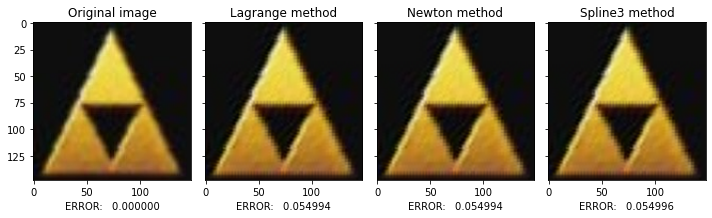

In [693]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), sharex=True, sharey=True)
ax = axes.ravel()
label = 'ERROR: {:10f}'
ax[0].imshow(original, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(error_original))
ax[0].set_title('Original image')

ax[1].imshow(newImage_l, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(error_lagrange))
ax[1].set_title('Lagrange method')

ax[2].imshow(newImage_n, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(error_newton))
ax[2].set_title('Newton method')

ax[3].imshow(newImage_s, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[3].set_xlabel(label.format(error_spline))
ax[3].set_title('Spline3 method')

plt.tight_layout()
plt.show()

***Pregunta: ¿Cual metodo presenta menor error? (5 puntos)***

# R:
Según los resultados anteriores, lagrange y newton presentan los menores errores.

# Consideraciones

* Solo trabajaremos con imagenes cuadradas
* En el caso que el valor interpolado de un punto sea mayor a 255 o menor a 0, este se trunca a 255 o 0 respectivamente
* Esta permitido el uso de sympy para calcular derivadas y para construir el polinomio interpolador 
* El calculo de error puede ser calculado utilizando la imagen en escala de grises [(ejemplo)](https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html)

# Referencias

* Método de Lagrange y Newton, Puntos de chebyshev: https://github.com/sct-utfsm/INF-285/blob/master/material/05_interpolacion_1D/interpolacion.ipynb
* Cálculo de errores: https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html